# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [38]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [39]:
df = pd.read_csv('data/nndb_flat.csv')

In [40]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [42]:
# Eliminar columnas específicas
columns_to_drop = ['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName']
dfd = df.drop(columns=columns_to_drop)

In [43]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   Energy_kcal       8618 non-null   float64
 2   Protein_g         8618 non-null   float64
 3   Fat_g             8618 non-null   float64
 4   Carb_g            8618 non-null   float64
 5   Sugar_g           8618 non-null   float64
 6   Fiber_g           8618 non-null   float64
 7   VitA_mcg          8618 non-null   float64
 8   VitB6_mg          8618 non-null   float64
 9   VitB12_mcg        8618 non-null   float64
 10  VitC_mg           8618 non-null   float64
 11  VitE_mg           8618 non-null   float64
 12  Folate_mcg        8618 non-null   float64
 13  Niacin_mg         8618 non-null   float64
 14  Riboflavin_mg     8618 non-null   float64
 15  Thiamin_mg        8618 non-null   float64
 16  Calcium_mg        8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

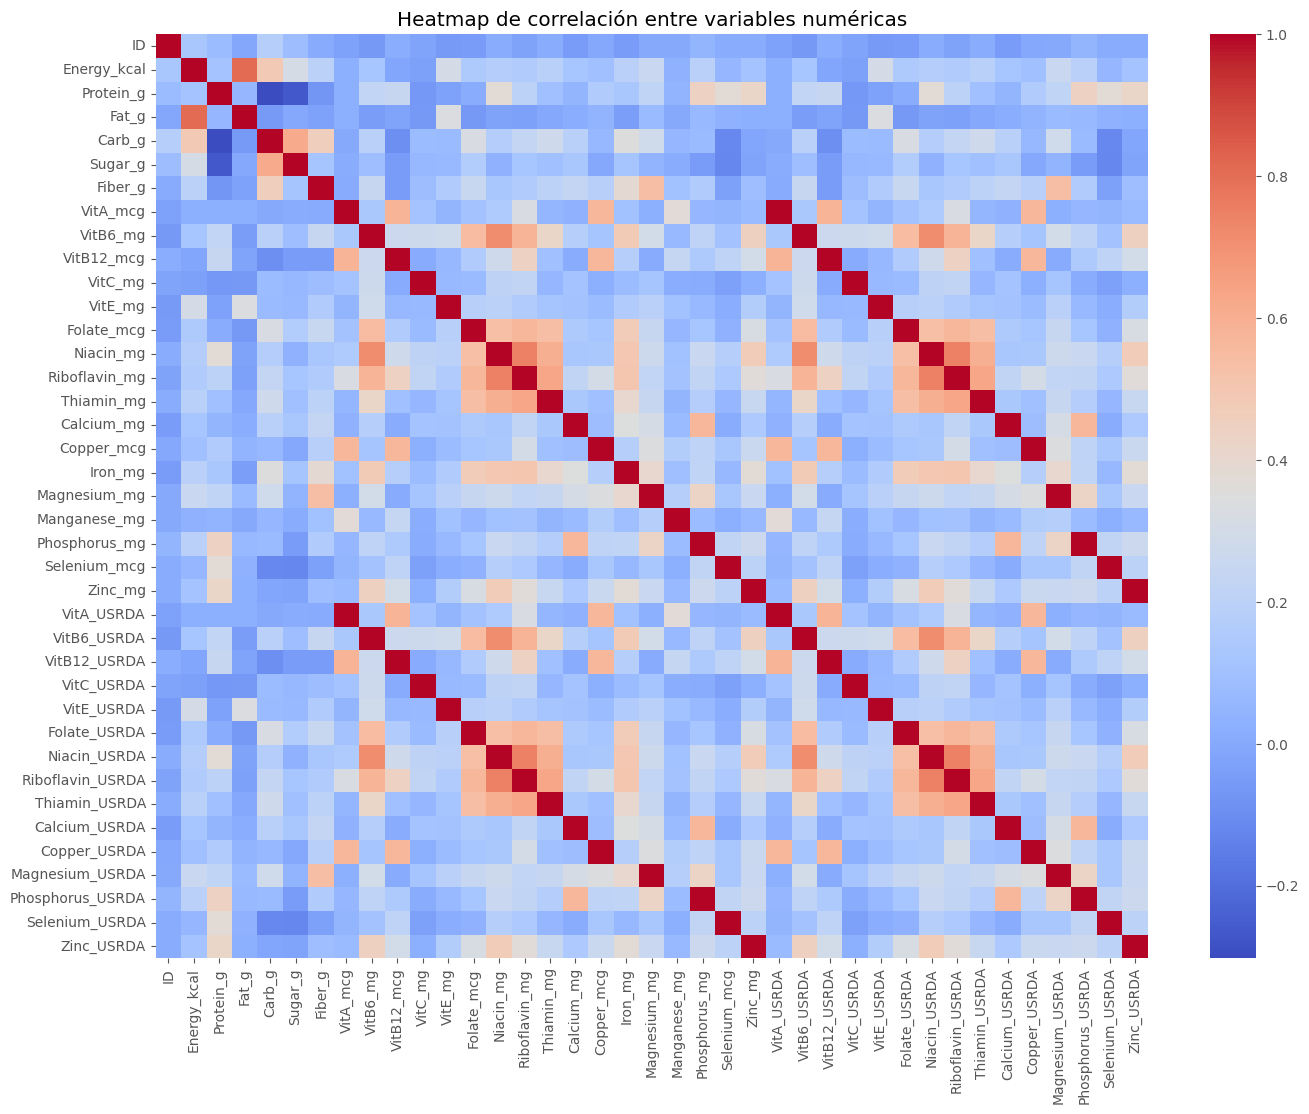

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = dfd.corr()

# Crear un heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Heatmap de correlación entre variables numéricas")
plt.show()



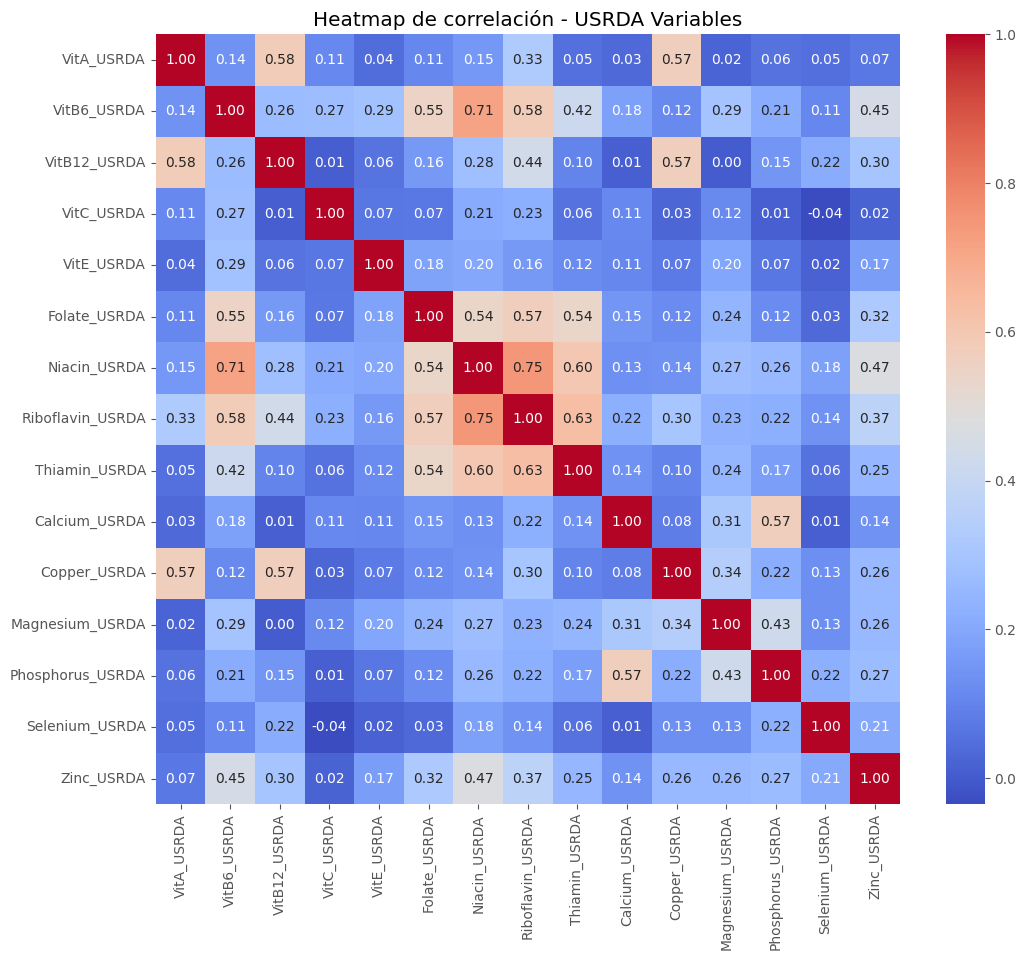

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las columnas USRDA
usrda_columns = [col for col in dfd.columns if 'USRDA' in col]
usrda_data = dfd[usrda_columns]

# Calcular la matriz de correlación para las columnas USRDA
usrda_correlation = usrda_data.corr()

# Crear un heatmap para las columnas USRDA
plt.figure(figsize=(12, 10))
sns.heatmap(usrda_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de correlación - USRDA Variables")
plt.show()


USRDA. Algunas observaciones importantes:

Alta correlación entre variables relacionadas:

Por ejemplo, Riboflavin_USRDA está altamente correlacionada con Niacin_USRDA (0.75) y Thiamin_USRDA (0.63).
Calcium_USRDA y Phosphorus_USRDA tienen una correlación significativa (0.56).
Potencial redundancia:

Algunas variables están muy relacionadas, lo que puede indicar redundancia. Esto puede impactar negativamente al realizar PCA, ya que las correlaciones altas pueden sesgar los componentes principales hacia estas variables.
Decisión necesaria:

Si buscamos reducir la redundancia, podríamos combinar algunas de estas columnas o eliminar las menos informativas antes de aplicar PCA. Por ejemplo, podemos usar una combinación de estas variables o elegir solo una por grupo con alta correlación

eliminar todas las USRDA que ya estan representadas

In [46]:
# Identificar las columnas que contienen "USRDA" en su nombre
usrda_columns = [col for col in dfd.columns if 'USRDA' in col]

# Eliminar las columnas del DataFrame
dfdu = dfd.drop(columns=usrda_columns)

# Verificar las columnas restantes
dfdu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8618 non-null   int64  
 1   Energy_kcal    8618 non-null   float64
 2   Protein_g      8618 non-null   float64
 3   Fat_g          8618 non-null   float64
 4   Carb_g         8618 non-null   float64
 5   Sugar_g        8618 non-null   float64
 6   Fiber_g        8618 non-null   float64
 7   VitA_mcg       8618 non-null   float64
 8   VitB6_mg       8618 non-null   float64
 9   VitB12_mcg     8618 non-null   float64
 10  VitC_mg        8618 non-null   float64
 11  VitE_mg        8618 non-null   float64
 12  Folate_mcg     8618 non-null   float64
 13  Niacin_mg      8618 non-null   float64
 14  Riboflavin_mg  8618 non-null   float64
 15  Thiamin_mg     8618 non-null   float64
 16  Calcium_mg     8618 non-null   float64
 17  Copper_mcg     8618 non-null   float64
 18  Iron_mg 

### Variables no numéricas
Elimina las variables de texto del dataset

Ya esta hecho en dfd

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [47]:
# Establecer la columna 'ID' como índice
dfdu.set_index('ID', inplace=True)

# Verificar el DataFrame actualizado
dfdu.head()



,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [48]:
dfdu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesium

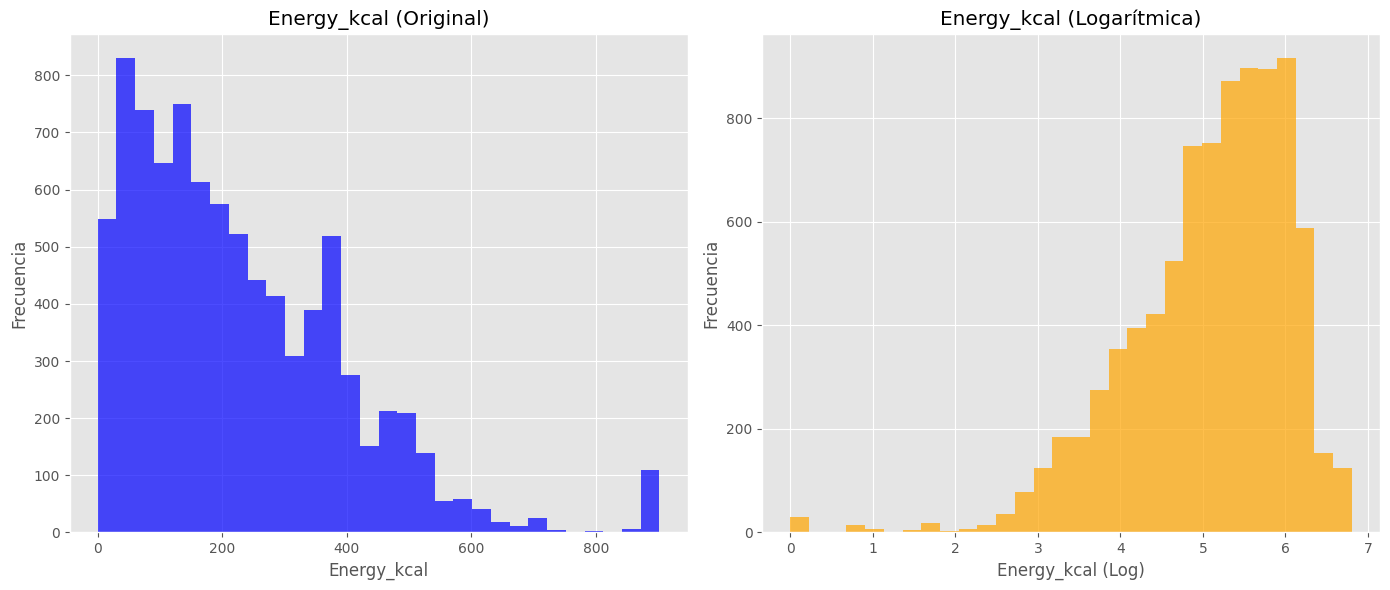

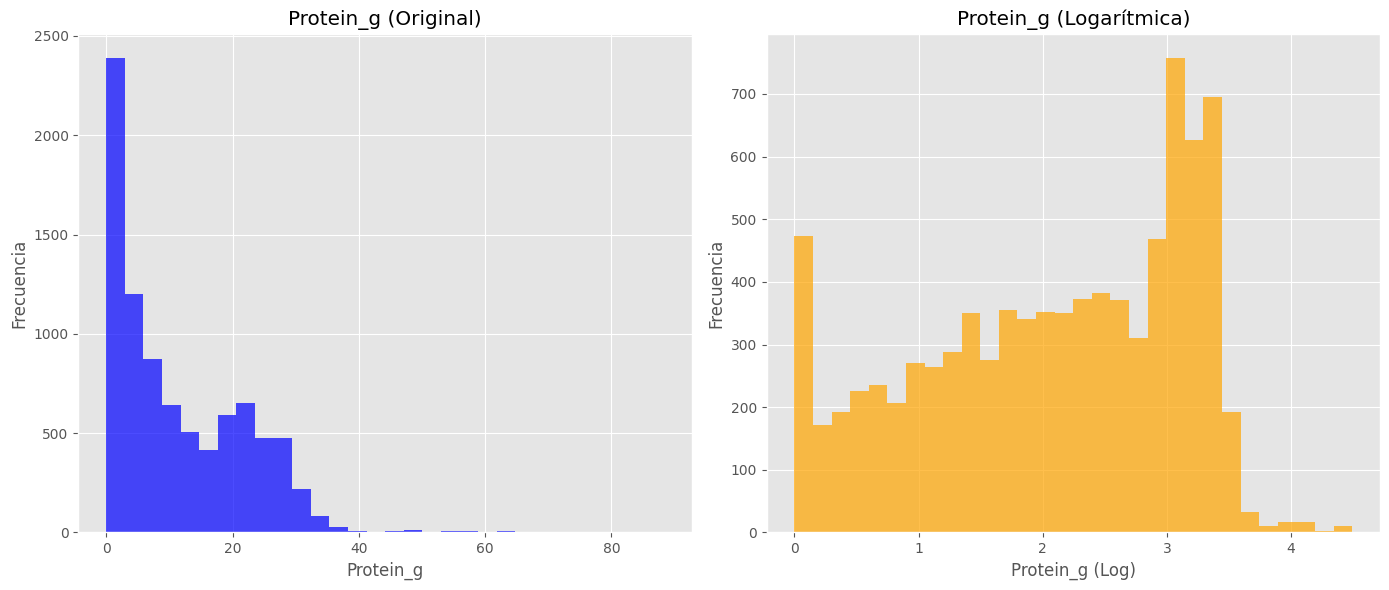

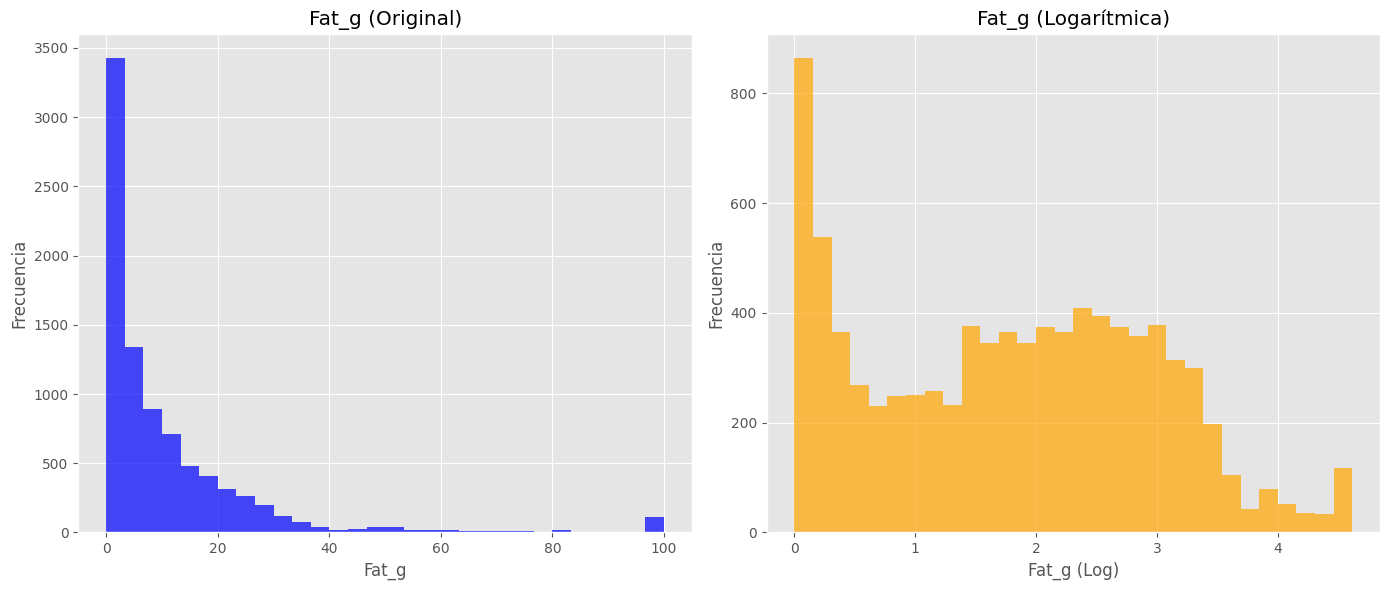

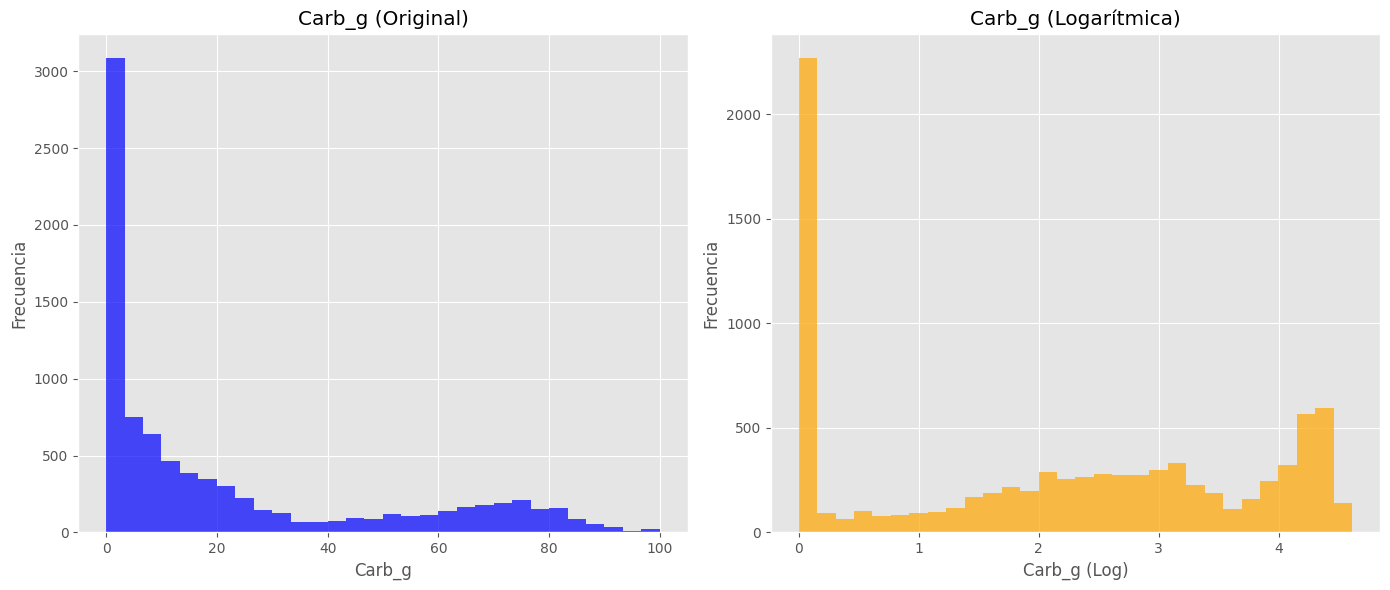

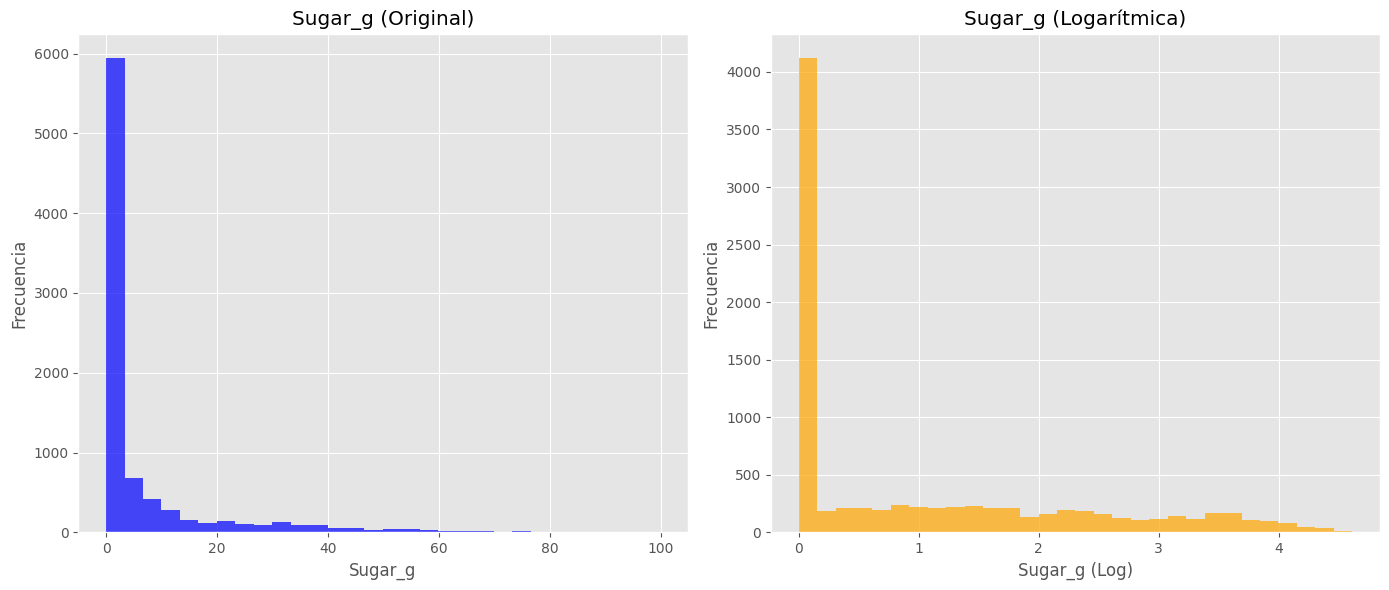

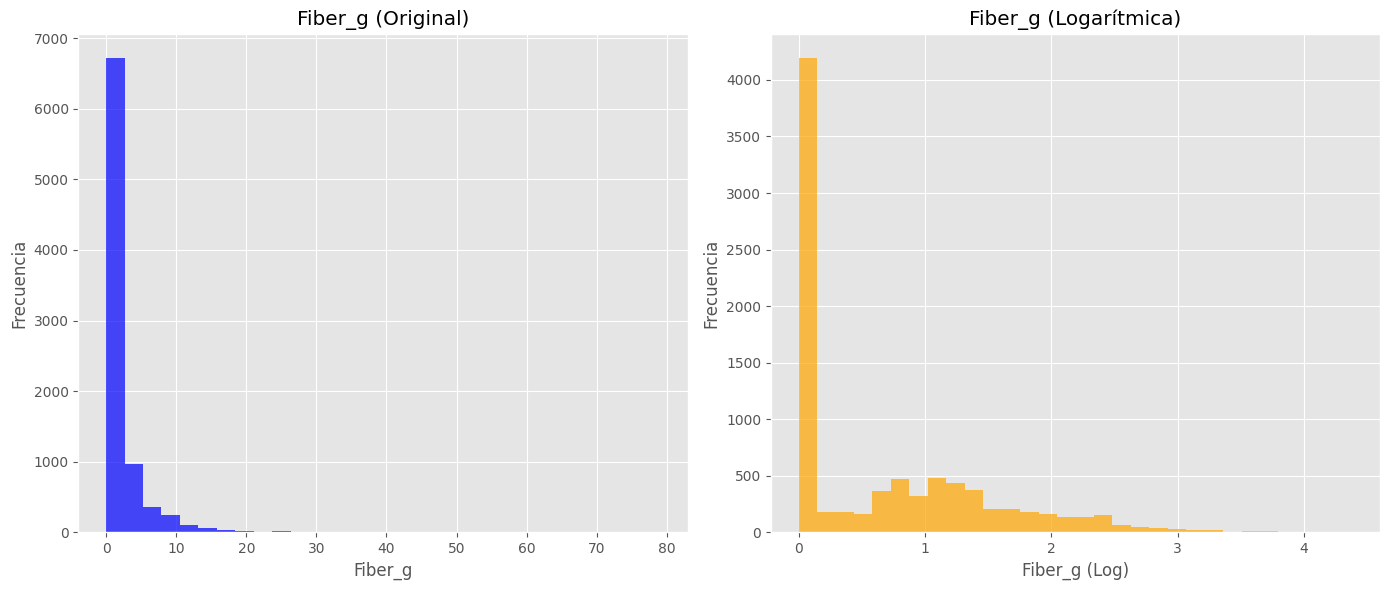

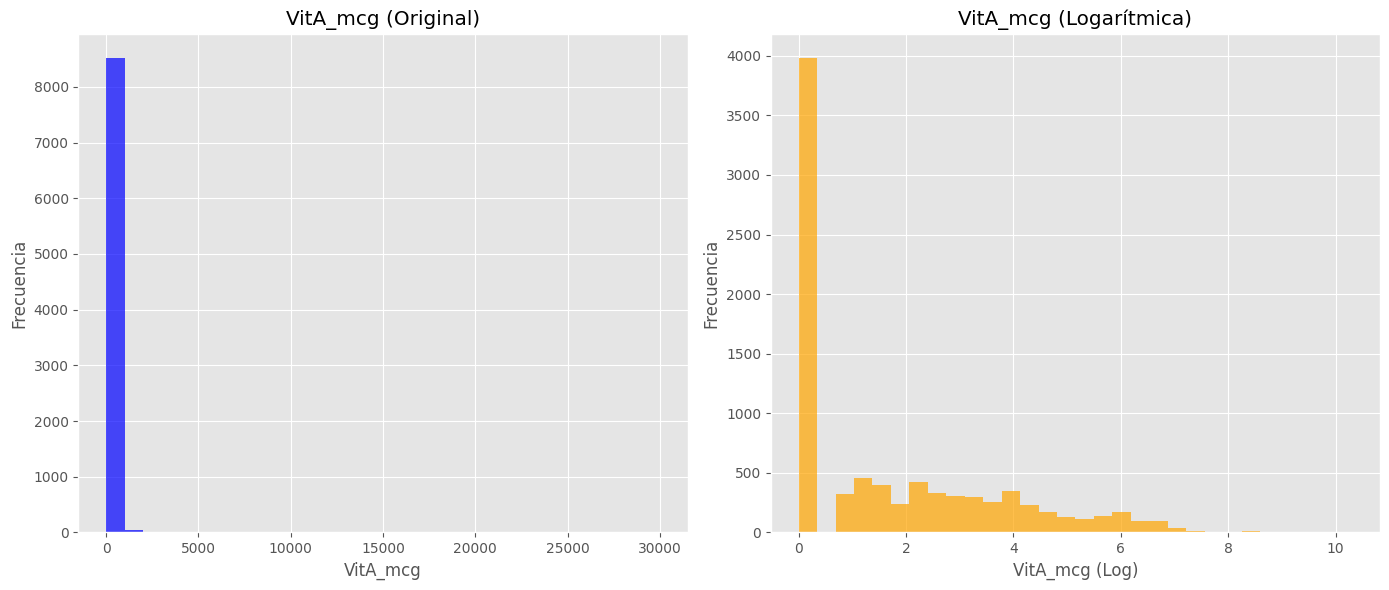

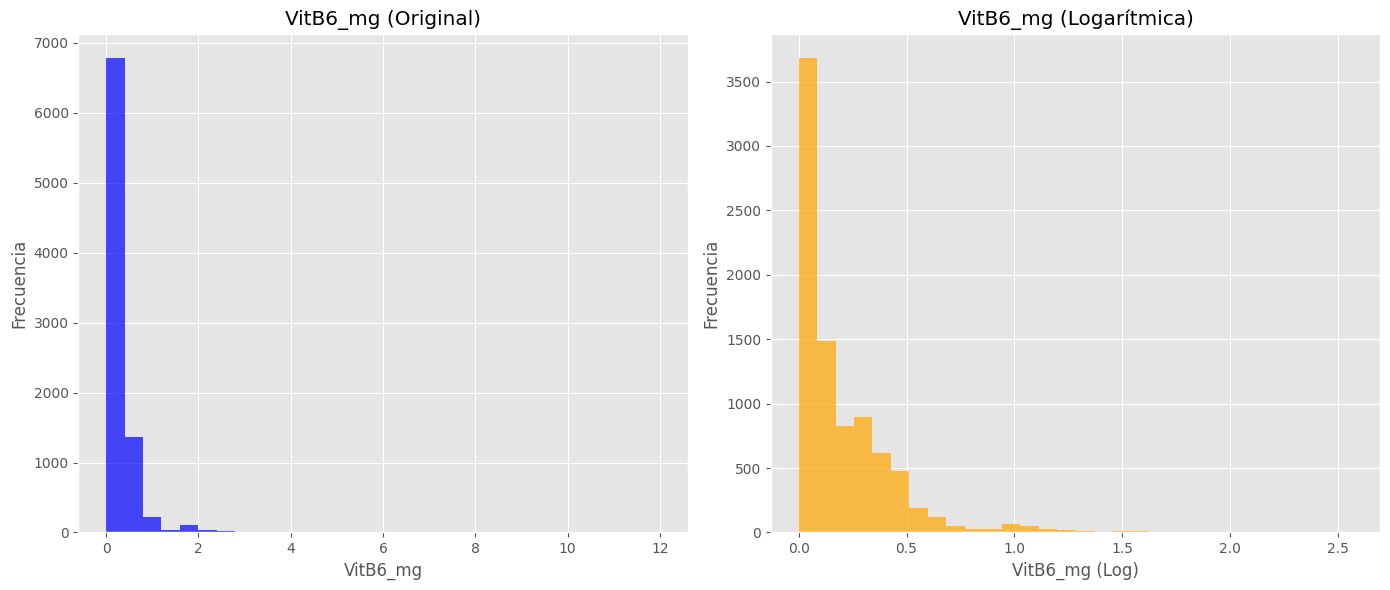

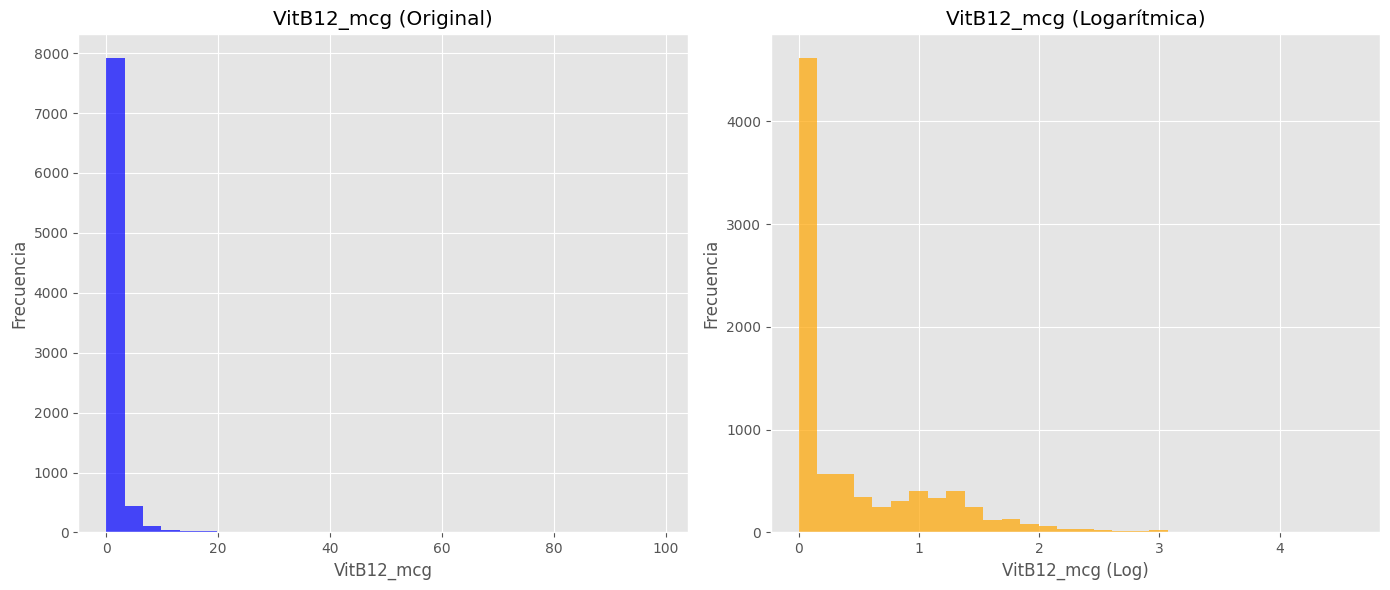

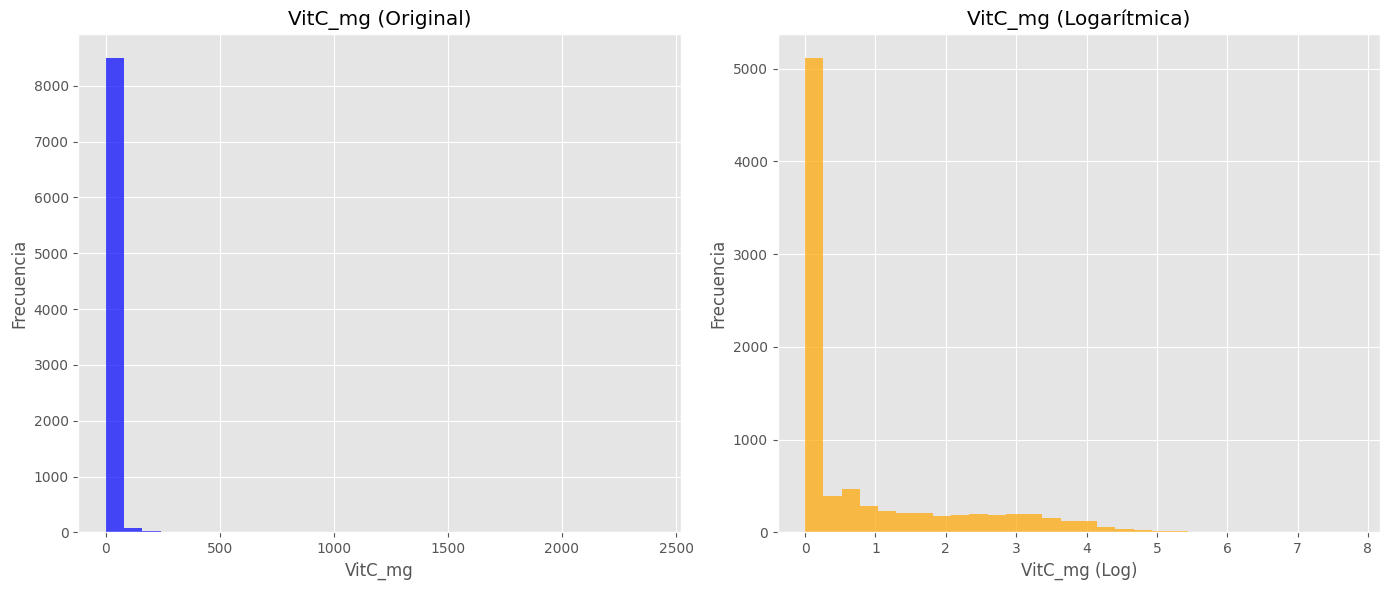

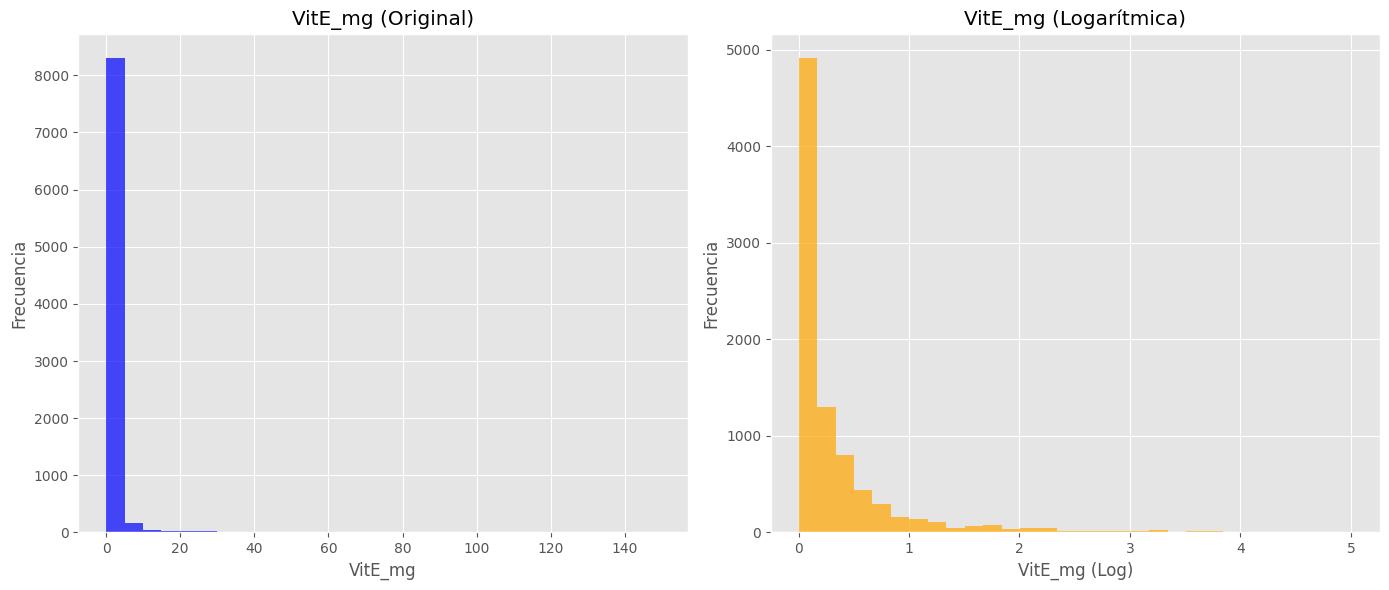

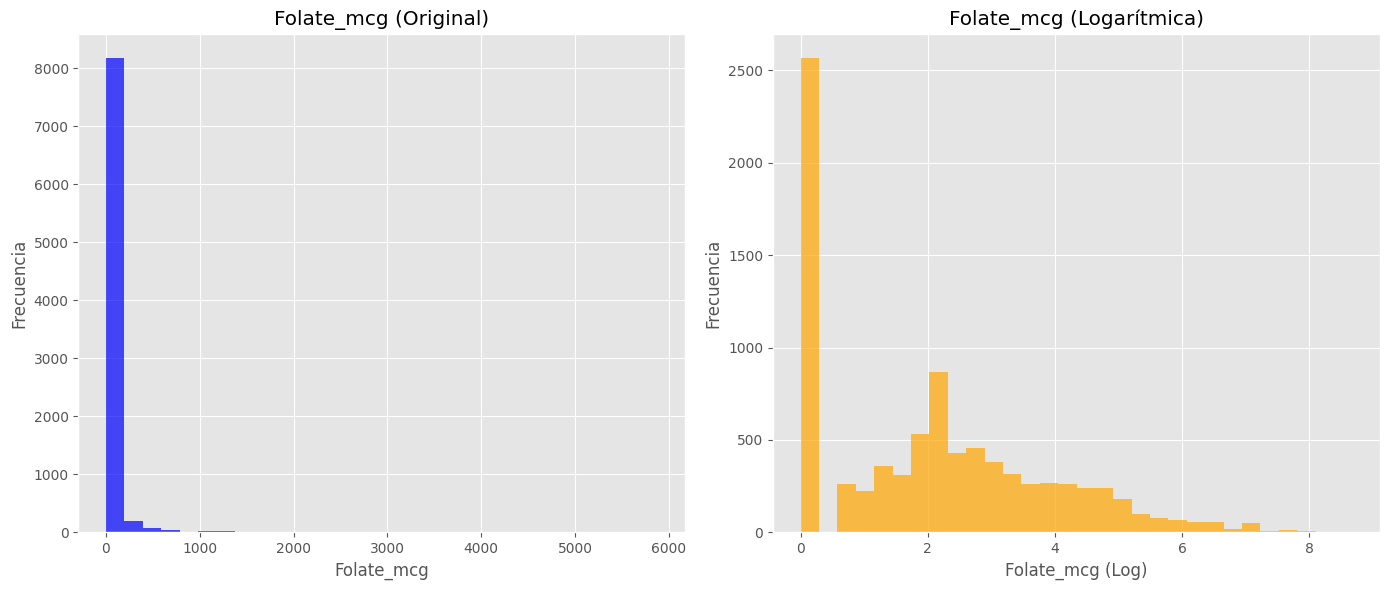

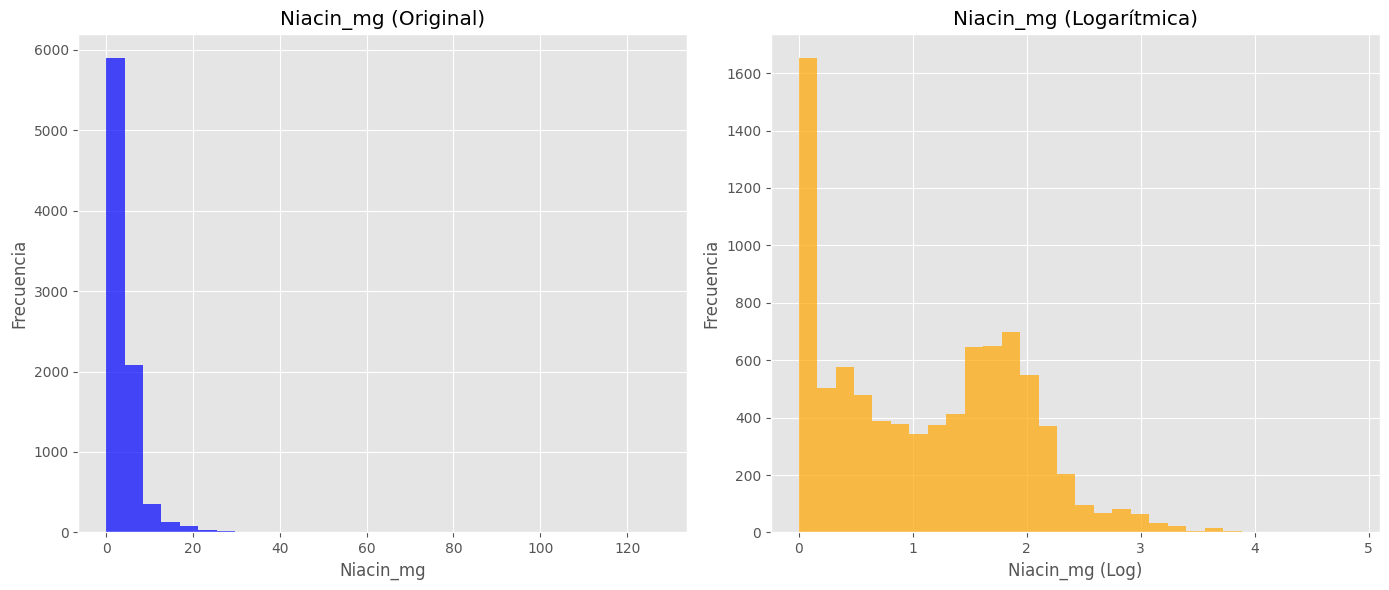

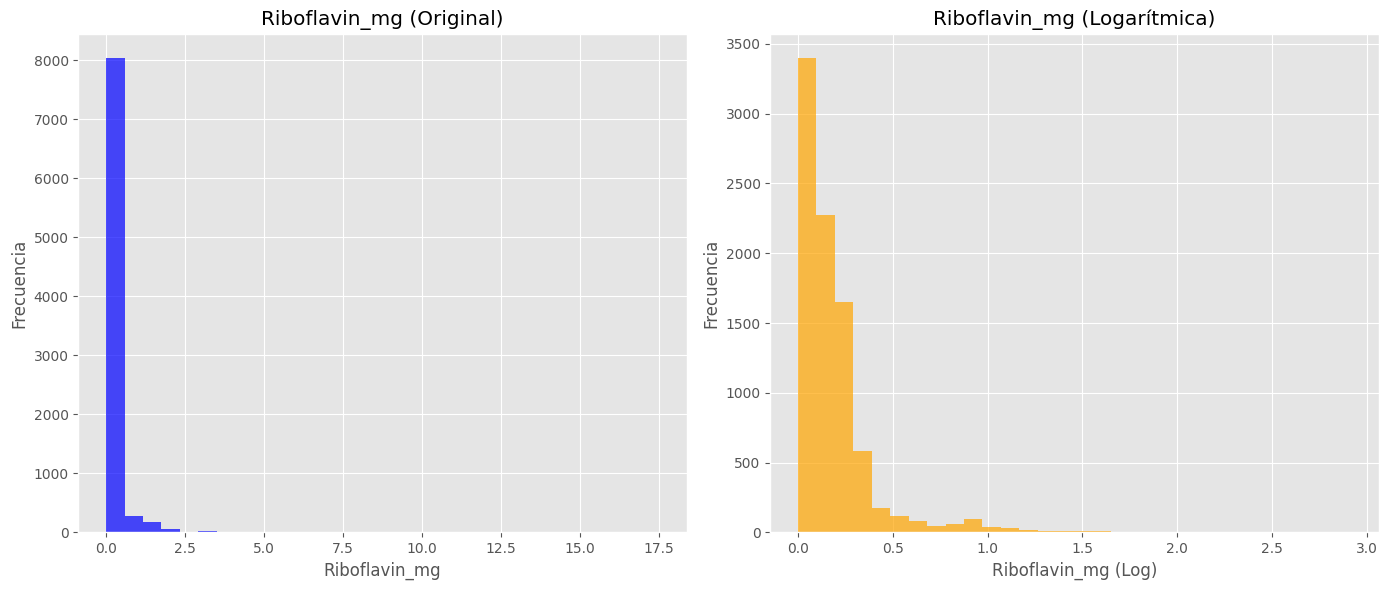

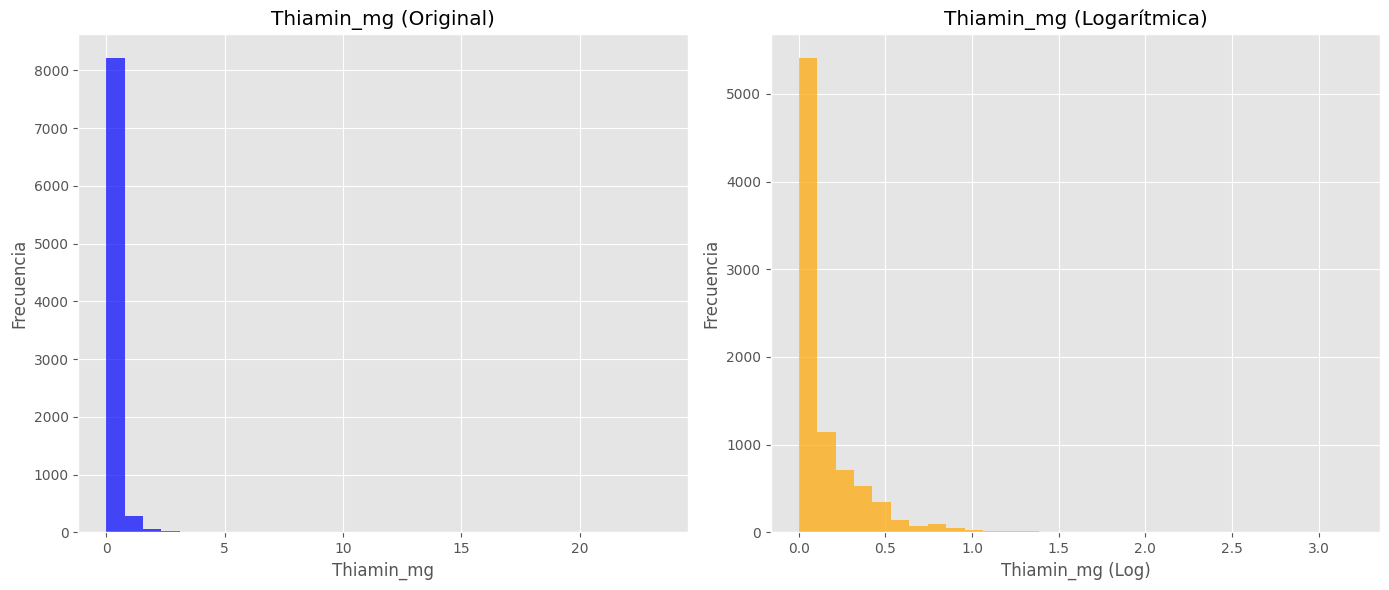

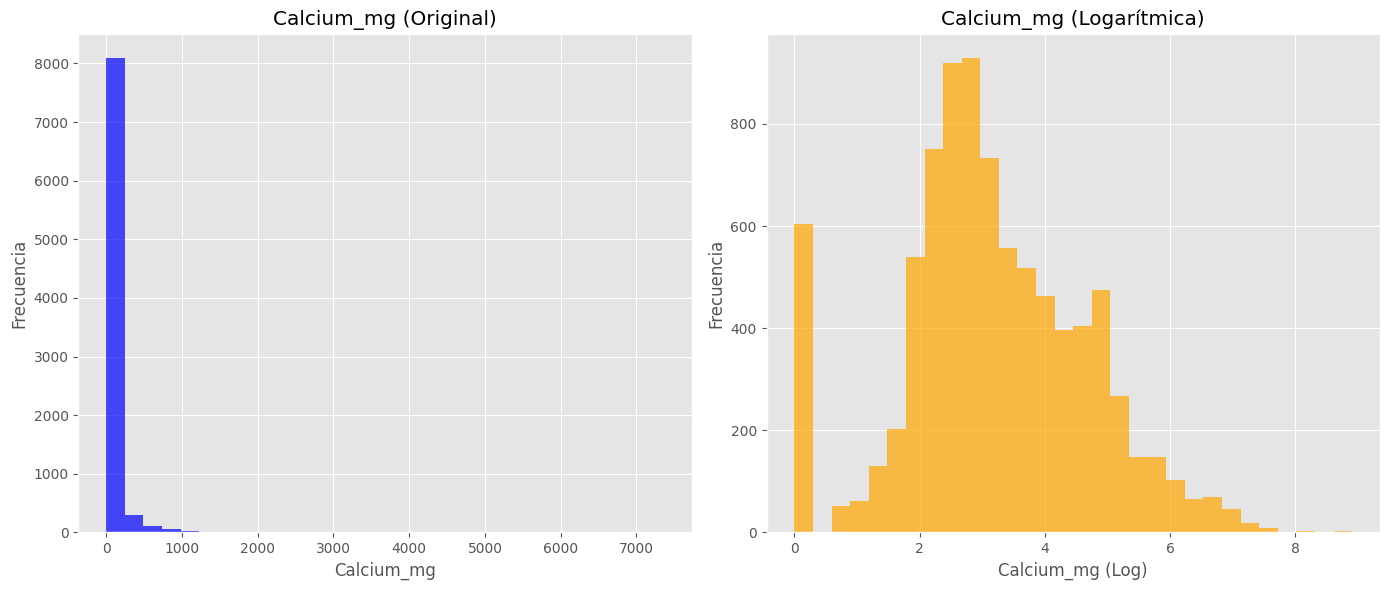

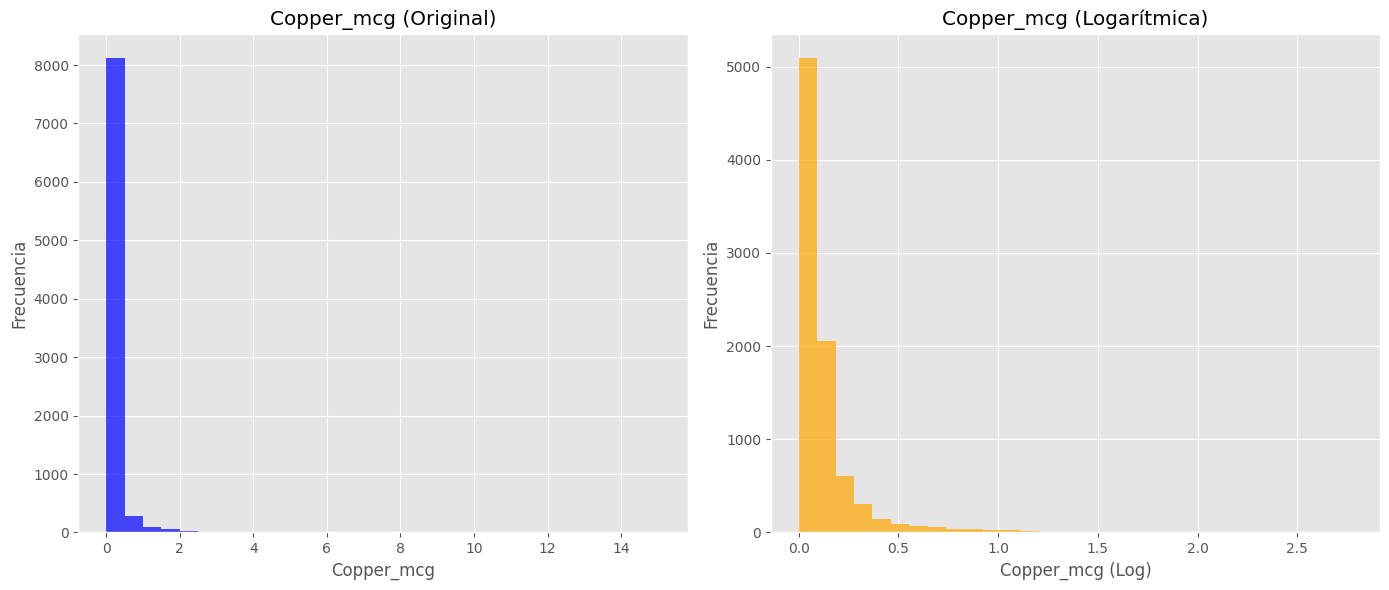

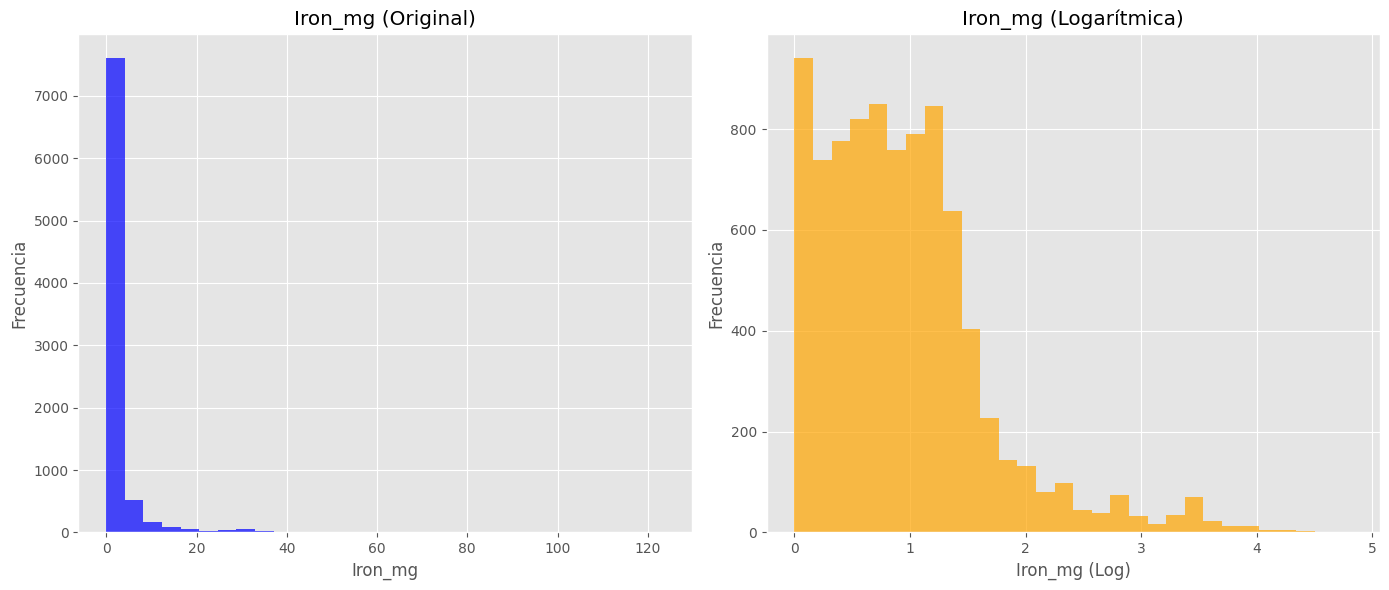

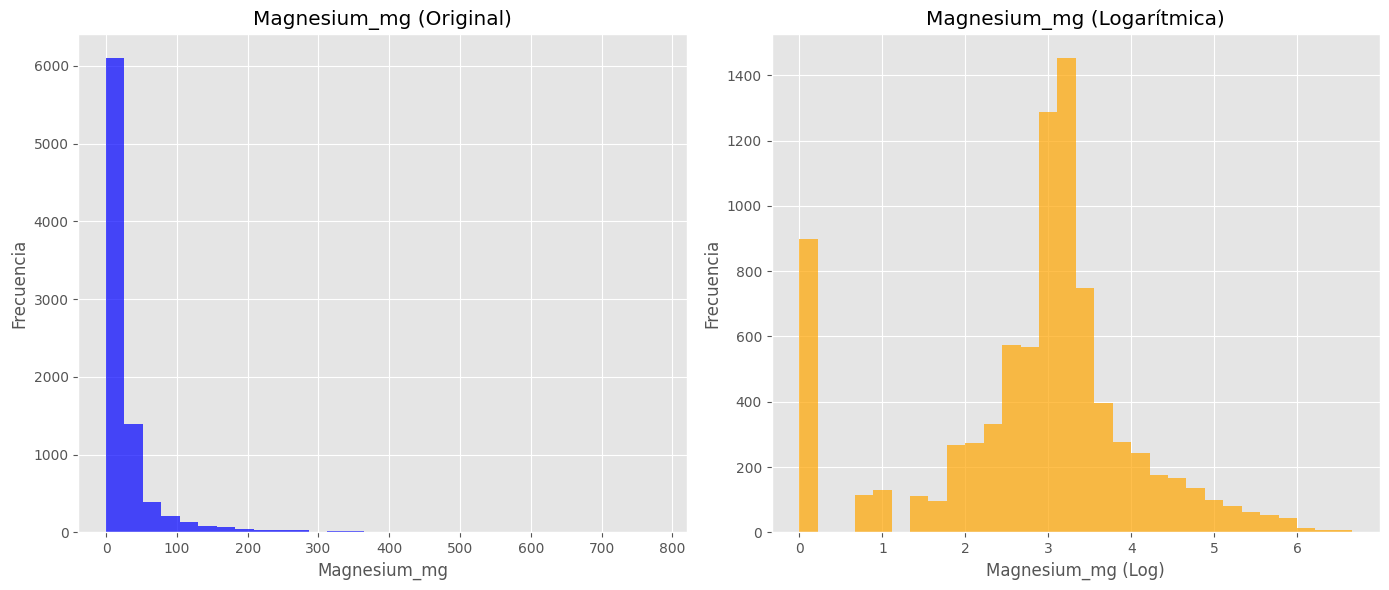

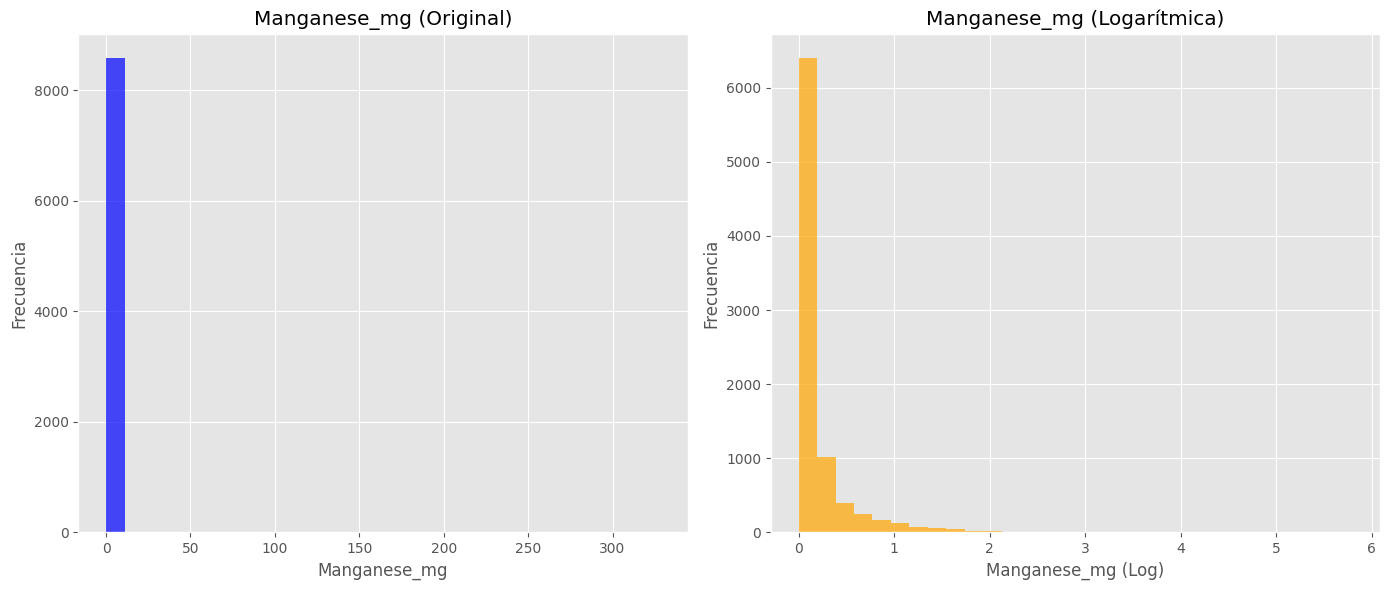

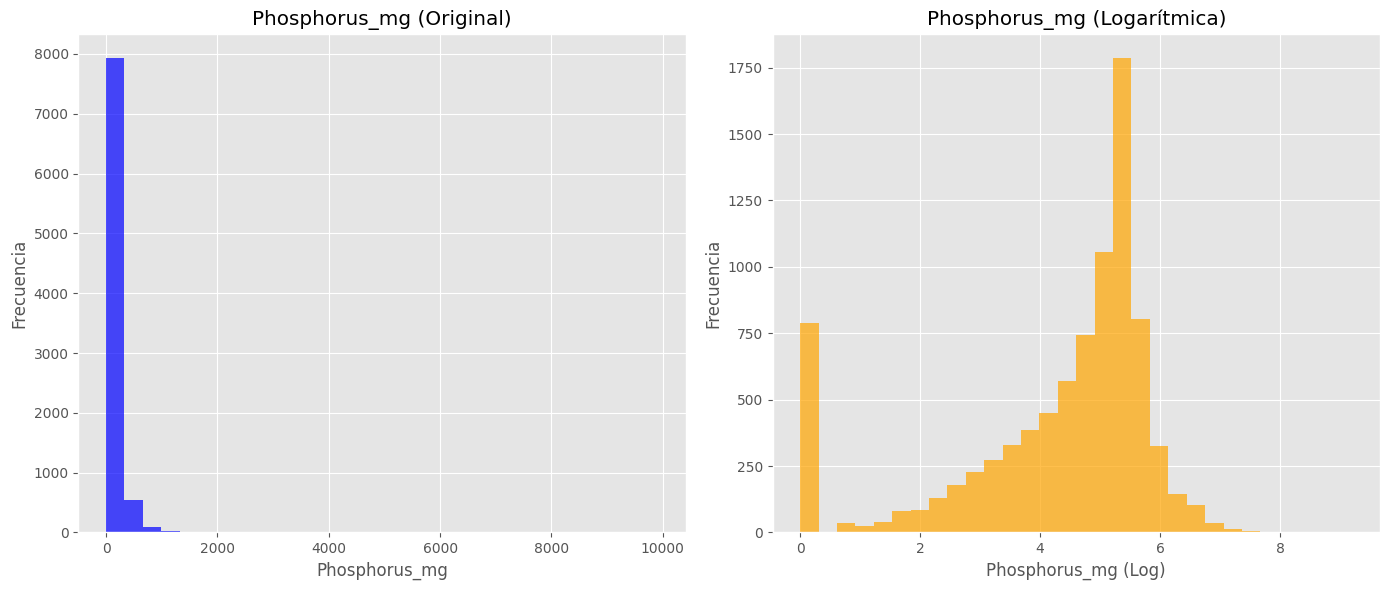

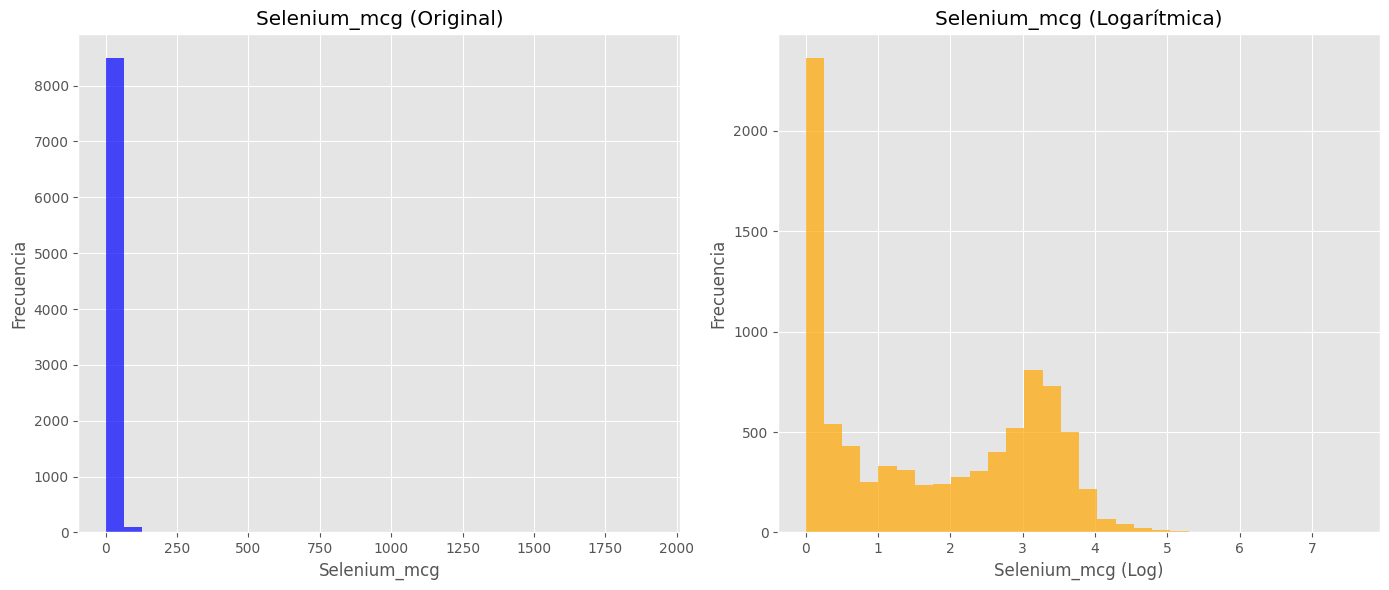

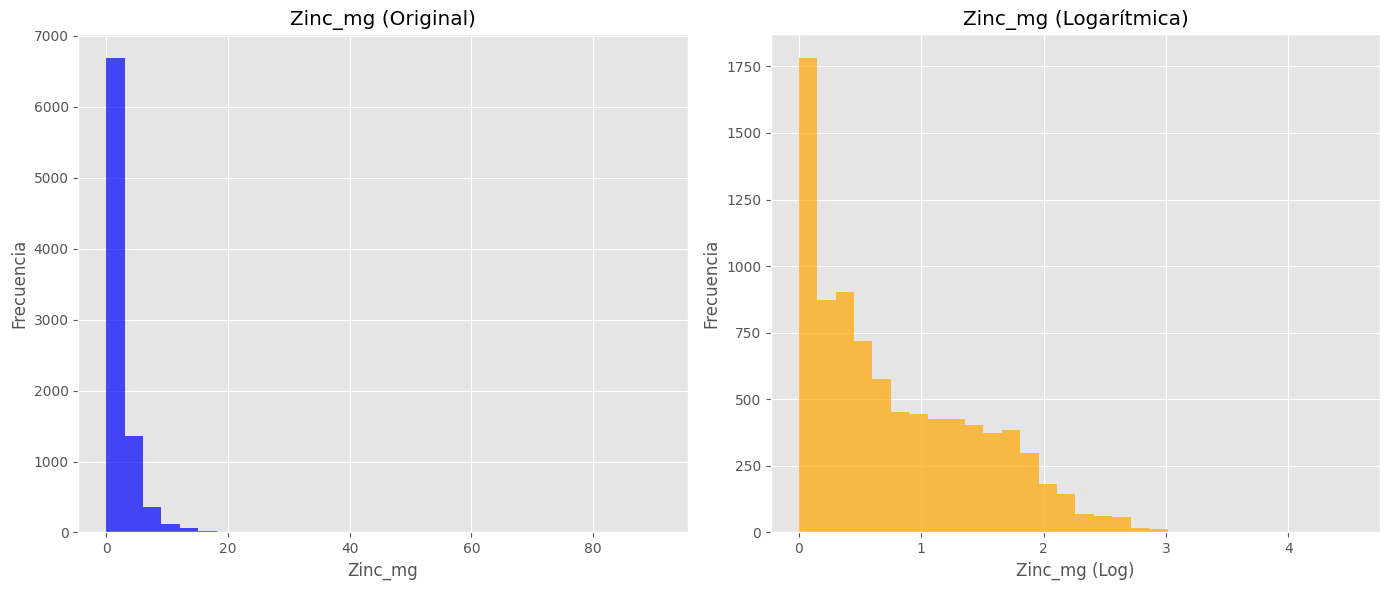

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la transformación logarítmica
dfdu_log = np.log1p(dfdu)

# Crear histogramas para cada variable
for column in dfdu.columns:
    plt.figure(figsize=(14, 6))
    
    # Histograma de la variable original
    plt.subplot(1, 2, 1)
    plt.hist(dfdu[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'{column} (Original)')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    
    # Histograma de la variable transformada
    plt.subplot(1, 2, 2)
    plt.hist(dfdu_log[column], bins=30, color='orange', alpha=0.7)
    plt.title(f'{column} (Logarítmica)')
    plt.xlabel(f'{column} (Log)')
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()



### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [50]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Escalar las variables numéricas
scaled_data = scaler.fit_transform(dfdu)

# Convertir los datos escalados en un DataFrame
dfdu_scaled = pd.DataFrame(scaled_data, index=dfdu.index, columns=dfdu.columns)

# Verificar las primeras filas del DataFrame escalado
dfdu_scaled.head()


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,
1001,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.244334,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.311347,-0.467425,-0.548385,-0.079028,-0.649918,-0.410557,-0.559918
1002,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.253595,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.282415,-0.442978,-0.548385,-0.078401,-0.654842,-0.410557,-0.571830
1003,3.834956,-1.065776,5.599153,-0.801069,-0.482325,-0.469058,0.957289,-0.550307,-0.281380,-0.137643,...,-0.516275,-0.402935,-0.344726,-0.309539,-0.470917,-0.584057,-0.079028,-0.753325,-0.445904,-0.583742
1004,0.747208,0.936124,1.140402,-0.715158,-0.445564,-0.469058,0.133490,-0.205541,-0.001218,-0.137643,...,0.321775,-0.348916,2.257682,-0.239017,-0.416784,-0.173821,-0.077618,1.137542,0.066632,0.205414
1005,0.853478,1.110532,1.199651,-0.698637,-0.444829,-0.469058,0.254109,-0.416579,0.008044,-0.137643,...,0.252864,-0.377855,2.982780,-0.267949,-0.395829,-0.155984,-0.077148,1.452687,0.066632,0.187546


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

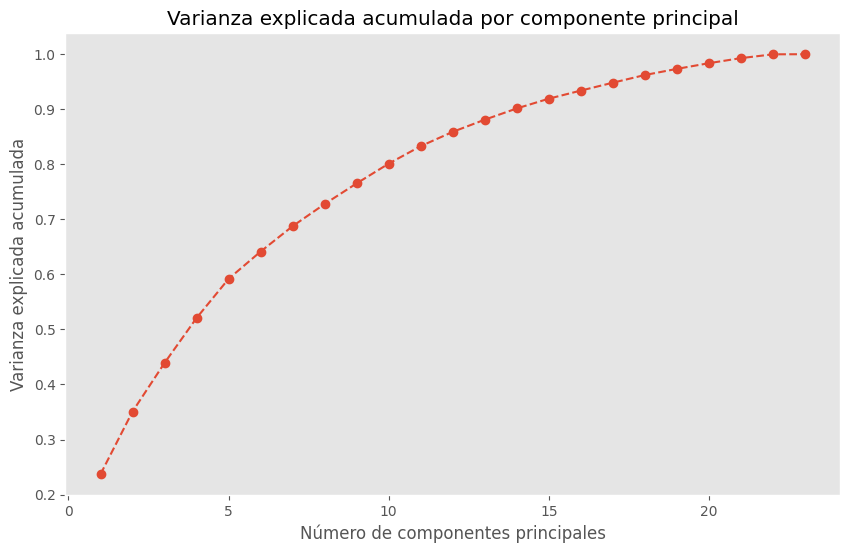

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
ID,,,,,,,,,,,,,,,,,,,,,
1001,-1.121776,1.182251,3.661940,1.080920,3.084161,0.838022,0.331073,-0.554879,-0.620704,-1.426270,...,0.755889,0.126454,0.328297,-0.617969,-0.052841,0.242175,-0.338832,0.208470,0.039810,-0.037014
1002,-1.114687,1.184173,3.662329,1.090738,3.077430,0.837098,0.323428,-0.551897,-0.630773,-1.432207,...,0.744742,0.106275,0.329752,-0.614961,-0.052676,0.242515,-0.317514,0.222450,0.037616,-0.036819
1003,-0.994919,1.573580,4.697724,1.317311,3.912684,0.940208,0.373919,-0.538498,-0.697954,-1.763517,...,0.920093,0.164202,0.429909,-0.710286,-0.059469,0.312961,-0.359950,0.238668,0.072217,-0.043196
1004,0.235910,-0.566070,1.905054,-0.834509,-0.438104,0.051566,1.709057,-1.160471,-0.395269,-0.275188,...,0.465612,0.324195,0.193857,-0.330713,0.577464,-0.434290,0.132495,-0.419169,-0.380635,-0.003282
1005,0.300785,-0.537659,2.307570,-0.903853,-0.875466,0.014515,2.158001,-1.460309,-0.483304,-0.282587,...,0.429353,0.399280,0.265936,-0.272140,0.748962,-0.473246,0.191197,-0.629038,-0.363742,-0.002252


In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(dfdu_scaled)

# Convertir el resultado a un DataFrame
pca_df = pd.DataFrame(
    data=pca_result,
    index=dfdu_scaled.index,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))]
)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_)+1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o',
    linestyle='--'
)
plt.title('Varianza explicada acumulada por componente principal')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

# Mostrar las primeras filas del DataFrame de PCA
pca_df.head()


### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías? con 8

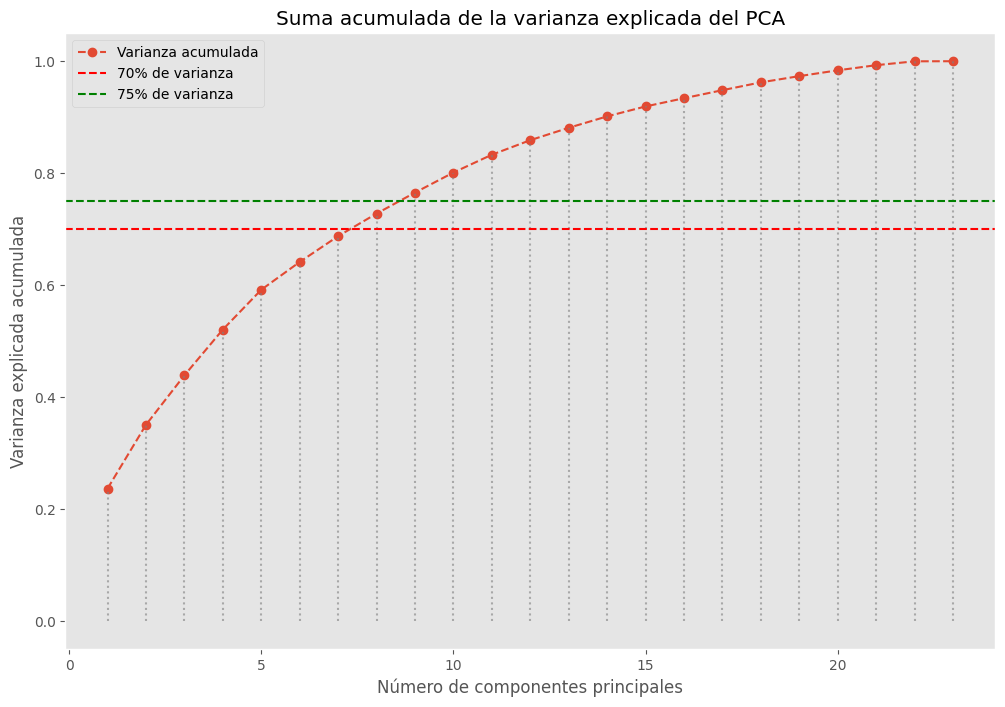

In [52]:
# Ajustar el PCA y calcular la varianza explicada acumulada
pca = PCA()
pca_result = pca.fit_transform(dfdu_scaled)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Visualizar la varianza explicada acumulada por componente con líneas individuales
plt.figure(figsize=(12, 8))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o',
    linestyle='--',
    label='Varianza acumulada'
)

# Agregar líneas individuales para cada componente
for i, var in enumerate(pca.explained_variance_ratio_, start=1):
    plt.plot([i, i], [0, np.cumsum(pca.explained_variance_ratio_)[i-1]], 
             color='gray', linestyle=':', alpha=0.6)

plt.axhline(y=0.70, color='r', linestyle='--', label='70% de varianza')
plt.axhline(y=0.75, color='g', linestyle='--', label='75% de varianza')
plt.title('Suma acumulada de la varianza explicada del PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.legend()
plt.grid()
plt.show()



## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [57]:
# Importar las librerías necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Reescalar el dataset (asegúrate de que dfdu está definido y cargado previamente)
#scaler = StandardScaler()
#dfdu_scaled = scaler.fit_transform(dfdu)

# Crear un PCA con 8 componentes principales
pca_reduced = PCA(n_components=8)
pca_reduced_result = pca_reduced.fit_transform(dfdu_scaled)

# Crear un nuevo DataFrame con los 8 componentes principales
dfdu_pca_8 = pd.DataFrame(
    data=pca_reduced_result,
    index=range(len(dfdu_scaled)),
    columns=[f'PC{i+1}' for i in range(8)]
)



In [58]:
dfdu_pca_8.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.121776,1.182251,3.661940,1.080920,3.084161,0.838022,0.331073,-0.554879
1,-1.114687,1.184173,3.662329,1.090738,3.077430,0.837098,0.323428,-0.551897
2,-0.994919,1.573580,4.697724,1.317311,3.912684,0.940208,0.373919,-0.538498
3,0.235910,-0.566070,1.905054,-0.834509,-0.438104,0.051566,1.709057,-1.160471
4,0.300785,-0.537659,2.307570,-0.903853,-0.875466,0.014515,2.158001,-1.460309
